# Рубежный контроль №1
### Тема: Технологии разведочного анализа и обработки данных.
### Сигал Денис Эдуардович ИУ5-61Б Вариант 15
## Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [67]:
data_raw=pd.read_csv('datasets/googleplaystore.csv',sep=",")

In [68]:
data_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [69]:
data_raw.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [70]:
total_count = data_raw.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10841


In [71]:
data_Rating = data_raw[['Rating']]
data_Rating.head()


,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [72]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_Rating)
imp_num = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
data_raw['Rating'] = imp_num.fit_transform(data_Rating)
data_Rating= imp_num.fit_transform(data_Rating)

In [73]:
data_raw.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

для пропусков в столбце Rating я использовал метод, который заменяет все пропуски, на константу 0, тк если приложение ещё не оценили его рэйтинг ровняеться 0

In [74]:
data_AV = data_raw[['Android Ver']]
data_AV

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
...,...
10836,4.1 and up
10837,4.1 and up
10838,2.2 and up
10839,Varies with device


In [75]:
data_AV['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [76]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(data_AV)

In [77]:
data_raw['Android Ver'] = data_imp2[:,0]

In [78]:
data_raw.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

для пропусков в столбце Android Ver я использовал метод, который заменяет пропуски на самые часто встречаемые значения, тк скорее всего для этих версий программы и были написанны

для построения модели, которая будет придугадывать рэтинг приложения, я бы использовал все признаки из данного датасета, тк их довольно мало и отдельно взятые они не смогут оценить факторы, которые смогут повлиять на оценивание приложения

In [79]:
#data_Rating=data_Rating.to_numpy()
data_Installs = data_raw[['Installs']].to_numpy()
data_Reviews = data_raw[['Reviews']].to_numpy()
data_Reviews_normal=[]
data_Installs_normal=[]
for i in range(len(data_Rating)):
  data_Rating[i]=int(data_Rating[i]*10)
  try:
    a=data_Installs[i][0]
    b=''
    for j in a:
      if ord(j)>47 and ord(j)<58:
        b+=j 
    data_Installs_normal.append(int(b))
  except:
    data_Installs_normal.append(0)
  try:
    data_Reviews_normal.append(int(data_Reviews[i][0]))
  except:
    data_Reviews_normal.append(0)
#for i in range(len(data_Rating)):
#  data_Rating[i]=int(data_Rating[i]*10)


/tmp/ipykernel_18859/1248718930.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_Rating[i]=int(data_Rating[i]*10)


In [83]:
data_Installs_normal

[10000,
 500000,
 5000000,
 50000000,
 100000,
 50000,
 50000,
 1000000,
 1000000,
 10000,
 1000000,
 1000000,
 10000000,
 100000,
 100000,
 5000,
 500000,
 10000,
 5000000,
 10000000,
 100000,
 100000,
 500000,
 100000,
 50000,
 10000,
 500000,
 100000,
 10000,
 100000,
 100000,
 50000,
 100000,
 100000,
 10000,
 100000,
 500000,
 5000000,
 10000,
 500000,
 10000,
 100000,
 10000000,
 100000,
 10000,
 10000000,
 100000,
 100000,
 100000,
 100000,
 1000000,
 100000,
 1000000,
 100000,
 100000,
 100000,
 50000,
 100000,
 100000,
 100000,
 10000,
 100000,
 1000000,
 100000,
 100000,
 10000,
 50000,
 5000000,
 100000,
 5000000,
 5000000,
 500000,
 10000000,
 100000,
 500000,
 50000,
 100000,
 1000000,
 100000,
 1000000,
 50000,
 1000000,
 500000,
 100000,
 1000000,
 1000000,
 100000,
 100000,
 1000000,
 100000,
 100000,
 1000000,
 1000000,
 1000000,
 1000000,
 500000,
 500000,
 100000,
 500000,
 1000000,
 100000,
 500000,
 1000000,
 500000,
 100000,
 1000000,
 50000,
 1000000,
 10000,
 10

<Axes: >

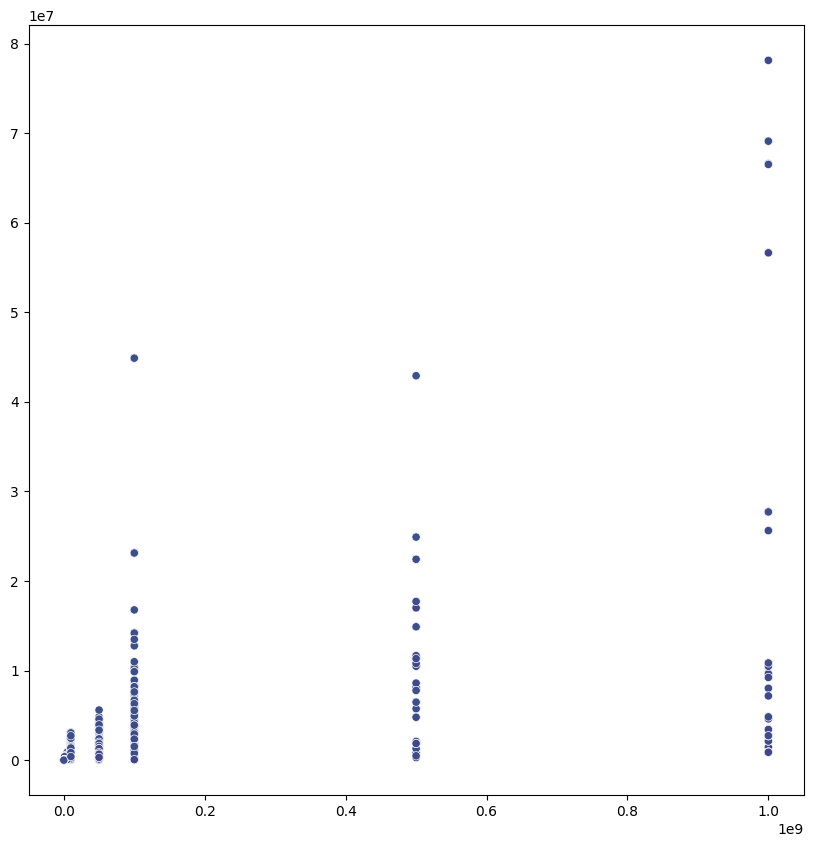

In [81]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x=data_Installs_normal, y=data_Reviews_normal,c=data_Rating)

<Axes: xlabel='Installs', ylabel='Reviews'>

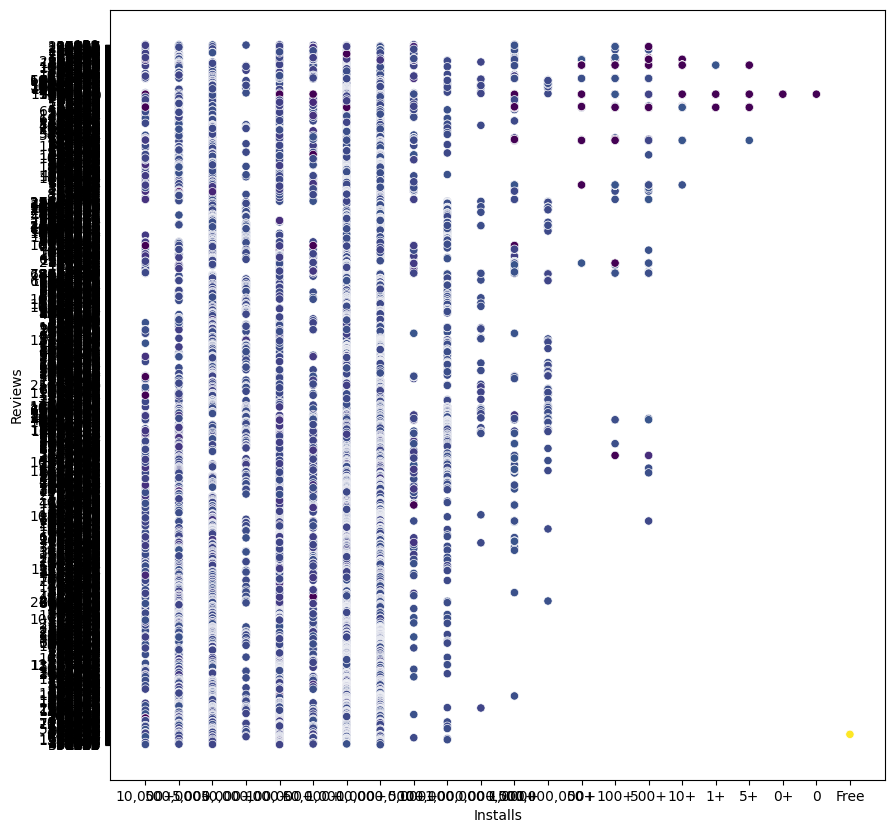

In [84]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Installs', y='Reviews',c=data_Rating, data=data_raw)

тк в данном датасете нет нормальных числовых столбцов, кроме рейтинга, то диаграмма рассеивания будет всегда выглядеть рваной. так же, если не перестраивать данные из датасета, то строковый тип не поддерживает нужного вида сортировки по значениям, для построения диаграммы